11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


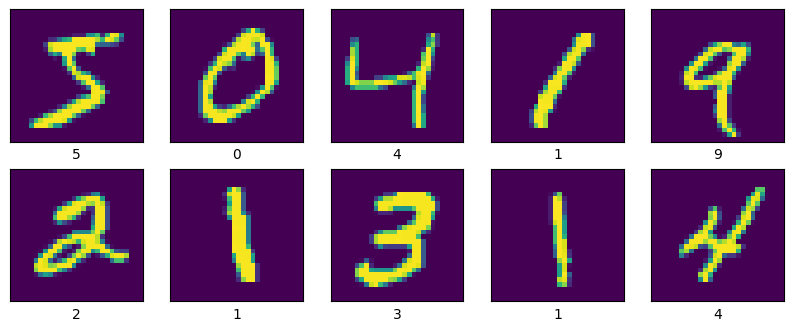

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(X_test.shape)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])

    plt.xlabel(y_train[i])
plt.show()

(42000, 28, 28)
(10000, 28, 28)


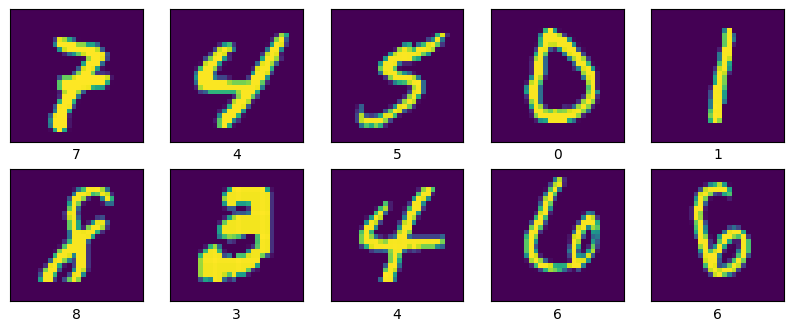

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])

    plt.xlabel(y_train[i])
plt.show()

In [ ]:

def get_block(images, num_blocks_x, num_blocks_y):

    rows, cols = images.shape[1:]

    block_size_rows = rows // num_blocks_x
    block_size_cols = cols // num_blocks_y

    images_blocks=[]

    # Slice the image matrix into blocks

    for image in (images):
        sliced_blocks = []
        for i in range(num_blocks_x):
            for j in range(num_blocks_y):
             block = image[i * block_size_rows: (i + 1) * block_size_rows, j * block_size_cols: (j + 1) * block_size_cols]
             sliced_blocks.append(block)

        images_blocks.append(sliced_blocks)
    images_blocks=np.array(images_blocks)

    return images_blocks

In [ ]:

def X_bar(img):

 XY=[]
 for i in range (len(img)):
    feature_vector=[]
    for block in range(len(img[i])):
        x_bar=0
        y_bar=0
        denomenator=np.sum(img[i][block])

        numerator1=0
        for x in range(len(img[i][block])):
            for y in range (len(img[i][block][x])):
                numerator1=x*img[i][block][x][y]+numerator1

        numerator2=0
        for y in range(img.shape[3]):
            for x in range (img.shape[2]):
                numerator2=y*img[i][block][x][y]+numerator2

        if denomenator != 0:
           x_bar = numerator1 / denomenator
           y_bar = numerator2 / denomenator
        else:
           x_bar = 0
           y_bar = 0
        feature_vector.append(x_bar)
        feature_vector.append(y_bar)
    feature_vector=np.array(feature_vector)

    XY.append(feature_vector)


 XY=np.array(XY)
 return XY

In [ ]:

num_blocks_x =3
num_blocks_y =3
X_train=get_block(X_train,num_blocks_x, num_blocks_y)
X_test=get_block(X_test,num_blocks_x, num_blocks_y)
print (X_train.shape)

print(X_test.shape)


(60000, 9, 9, 9)
(10000, 9, 9, 9)


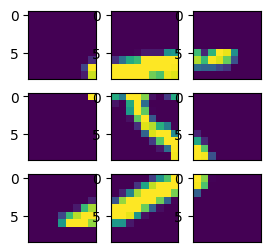

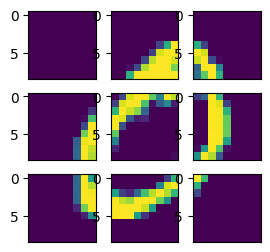

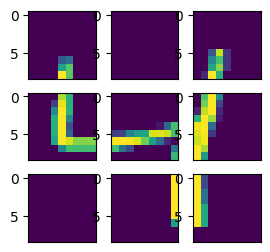

In [ ]:
for j in range (3):
    plt.figure(figsize=(3,3))
    for i in range(X_train.shape[1]):
        plt.subplot(num_blocks_x,num_blocks_y,i+1)
        plt.xticks([])
        plt.grid(False)
        plt.imshow(X_train[j][i])
    plt.show()


In [ ]:
X_bar_train=X_bar(X_train)
X_bar_test=X_bar(X_test)
print(X_bar_train.shape)
print(X_bar_test.shape)

(60000, 18)
(10000, 18)


# classifier SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_bar_train, y_train)

# Predict labels for test set
y_pred = svm_classifier.predict(X_bar_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8187


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_classifier.fit(X_bar_train, y_train)

# Predict labels for the test set
y_pred_knn = knn_classifier.predict(X_bar_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.9127


In [ ]:
num_blocks_x =2
num_blocks_y =4
X_train=get_block(X_train,num_blocks_x, num_blocks_y)
X_test=get_block(X_test,num_blocks_x, num_blocks_y)
print (X_train.shape)

print(X_test.shape)


(60000, 8, 14, 7)
(10000, 8, 14, 7)


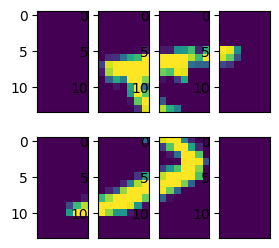

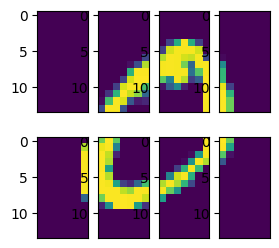

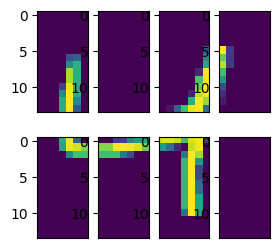

In [ ]:
for j in range (3):
    plt.figure(figsize=(3,3))
    for i in range(X_train.shape[1]):
        plt.subplot(num_blocks_x,num_blocks_y,i+1)
        plt.xticks([])
        plt.grid(False)
        plt.imshow(X_train[j][i])
    plt.show()


In [ ]:
X_bar_train=X_bar(X_train)
X_bar_test=X_bar(X_test)
print(X_bar_train.shape)
print(X_bar_test.shape)

(60000, 16)
(10000, 16)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN classifier
knn_classifier.fit(X_bar_train, y_train)

# Predict labels for the test set
y_pred_knn = knn_classifier.predict(X_bar_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.8927


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_bar_train, y_train)

# Predict labels for test set
y_pred = svm_classifier.predict(X_bar_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8163
